In [1]:
%matplotlib inline
import utils; reload(utils)
from utils import *
from __future__ import division, print_function

ERROR (theano.sandbox.cuda): ERROR: Not using GPU. Initialisation of device gpu failed:
initCnmem: cnmemInit call failed! Reason=CNMEM_STATUS_OUT_OF_MEMORY. numdev=1



RuntimeError: Cuda error: kernel_reduce_ccontig_node_meb404c8cd39208f6884dd773b584b7d7_0: out of memory. (grid: 1 x 1; block: 256 x 1 x 1)

Apply node that caused the error: GpuCAReduce{add}{1}(<CudaNdarrayType(float32, vector)>)
Toposort index: 0
Inputs types: [CudaNdarrayType(float32, vector)]
Inputs shapes: [(10000,)]
Inputs strides: [(1,)]
Inputs values: ['not shown']
Outputs clients: [[HostFromGpu(GpuCAReduce{add}{1}.0)]]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

In [1]:
import pickle

In [1]:
[i*j for i,j in zip([1,2,3],[4,5,6])]

[4, 10, 18]

In [2]:
path = '/mnt/fast_ai/glove/'
res_path = path

## Preprocessing

This section shows how we processed the original glove text files. However, there's no need for you to do this, since we provide the [pre-processed glove data](www.platform.ai/models/glove).

In [7]:
def get_glove(name):
    with open(path+ 'glove.' + name + '.txt', 'r') as f: lines = [line.split() for line in f]
    words = [d[0] for d in lines]
    vecs = np.stack(np.array(d[1:], dtype=np.float32) for d in lines)
    wordidx = {o:i for i,o in enumerate(words)}
    save_array(res_path+name+'.dat', vecs)
    pickle.dump(words, open(res_path+name+'_words.pkl','wb'))
    pickle.dump(wordidx, open(res_path+name+'_idx.pkl','wb'))

In [10]:
%mkdir glove

In [16]:
get_glove('6B.50d')
get_glove('6B.100d')
get_glove('6B.200d')
get_glove('6B.300d')

IOError: [Errno 2] No such file or directory: '/datadrive/fast_ai_course/glove/glove.6B.50d.txt'

## Looking at the vectors

After you've downloaded the [pre-processed glove data](www.platform.ai/models/glove), you should use `tar -zxf` to untar them, and put them in the path that {res_path} points to. (If you don't have a great internet connection, feel free to only download the 50d version, since that's what we'll be using in class). 

Then the following function will return the word vectors as a matrix, the word list, and the mapping from word to index.

In [3]:
res_path='/mnt/glove/'
import bcolz
def load_array(fname):
    return bcolz.open(fname)[:]

In [4]:
def load_glove(loc):
    return (load_array(loc+'.dat'),
        pickle.load(open(loc+'_words.pkl','rb' ),encoding='latin1'),
        pickle.load(open(loc+'_idx.pkl','rb'),encoding='latin1'))

In [5]:
vecs, words, wordidx = load_glove(res_path+'6B.50d')
vecs.shape

(400000, 50)

In [18]:
vecs[0]

array([  4.18000013e-01,   2.49679998e-01,  -4.12420005e-01,
         1.21699996e-01,   3.45270008e-01,  -4.44569997e-02,
        -4.96879995e-01,  -1.78619996e-01,  -6.60229998e-04,
        -6.56599998e-01,   2.78430015e-01,  -1.47670001e-01,
        -5.56770027e-01,   1.46579996e-01,  -9.50950012e-03,
         1.16579998e-02,   1.02040000e-01,  -1.27920002e-01,
        -8.44299972e-01,  -1.21809997e-01,  -1.68009996e-02,
        -3.32789987e-01,  -1.55200005e-01,  -2.31309995e-01,
        -1.91809997e-01,  -1.88230002e+00,  -7.67459989e-01,
         9.90509987e-02,  -4.21249986e-01,  -1.95260003e-01,
         4.00710011e+00,  -1.85939997e-01,  -5.22870004e-01,
        -3.16810012e-01,   5.92130003e-04,   7.44489999e-03,
         1.77780002e-01,  -1.58969998e-01,   1.20409997e-02,
        -5.42230010e-02,  -2.98709989e-01,  -1.57490000e-01,
        -3.47579986e-01,  -4.56370004e-02,  -4.42510009e-01,
         1.87849998e-01,   2.78489990e-03,  -1.84110001e-01,
        -1.15139998e-01,

Here's the first 25 "words" in glove.

In [12]:
' '.join(words[:25])

'the , . of to and in a " \'s for - that on is was said with he as it by at ( )'

This is how you can look up a word vector.

In [11]:
def w2v(w): return vecs[wordidx[w]]

In [14]:
w2v('of')

array([ 0.7085,  0.5709, -0.4716,  0.1805,  0.5445,  0.726 ,  0.1816, -0.5239,  0.1038, -0.1757,
        0.0789, -0.3622, -0.1183, -0.8334,  0.1192, -0.1661,  0.0616, -0.0127, -0.5662,  0.0136,
        0.2285, -0.144 , -0.0675, -0.3816, -0.237 , -1.7037, -0.8669, -0.267 , -0.2589,  0.1767,
        3.8676, -0.1613, -0.1327, -0.6888,  0.1844,  0.0052, -0.3387, -0.079 ,  0.2419,  0.3658,
       -0.3473,  0.2848,  0.0757, -0.0622, -0.3899,  0.229 , -0.2162, -0.2256, -0.0939, -0.8037], dtype=float32)

Just for fun, let's take a look at a 2d projection of the first 350 words, using [T-SNE](http://distill.pub/2016/misread-tsne/).

In [8]:
import sys
sys.setdefaultencoding('utf8')

AttributeError: module 'sys' has no attribute 'setdefaultencoding'

In [9]:
tsne = TSNE(n_components=2, random_state=0)
Y = tsne.fit_transform(vecs[:500])

start=0; end=350
dat = Y[start:end]
plt.figure(figsize=(15,15))
plt.scatter(dat[:, 0], dat[:, 1])
for label, x, y in zip(words[start:end], dat[:, 0], dat[:, 1]):
    plt.text(x,y,label, color=np.random.rand(3)*0.7,
                 fontsize=14)
plt.show()

NameError: name 'TSNE' is not defined

## itzik task

In [14]:
import pandas as pd
data=pd.read_csv('../../../exp-kb.csv')

In [28]:
data.TITLE[0]

'Running Reporting Module 4.1 with a large objects.C file causes the fw.exe process to reach 100% CPU utilization'

In [41]:
data.head(2)

,ID,SK,TITLE,STATUS,PARTITION,TEXT,CAUSE,FIX
0,10022.0.1181729.2444135,10022.0.1181729.2444135,Running Reporting Module 4.1 with a large obje...,Approved,Advanced,Running Reporting module with a large objects....,OMI server has a 500 object limit,To increase the object limit:<br><br>1. Increa...
1,10022.0.1181729.2444135,10022.0.1181729.2444135,Running Reporting Module 4.1 with a large obje...,Approved,Advanced,The gears grind continuously,OMI server has a 500 object limit,To increase the object limit:<br><br>1. Increa...


In [31]:
from nltk.stem.api import StemmerI

In [37]:
from nltk.stem.lancaster import LancasterStemmer

In [38]:
si=StemmerI()
sl=LancasterStemmer()

In [48]:
def text2vec(text):
    text_sum=np.zeros(50)
    for word in text.split(' '):
        try:
            text_sum+=w2v(word.lower())
        except:
            pass
    return text_sum

In [49]:
word_sums={}
for title in data.TITLE:
    word_sums[title]=text2vec(title)

In [50]:
word_sums

{"'Cannot find board type' messsage explained": array([ 1.3577, -0.3459, -0.1833, -0.1649,  1.9292, -0.1467, -1.9046,  0.3189,  0.3465, -1.3528,
         0.2685,  1.933 , -0.8595,  0.2131,  1.3084,  1.0863,  0.2923,  0.0784,  0.4936, -2.5313,
         0.6866,  1.0618,  0.4178, -0.0225,  1.1338, -4.5428, -1.056 ,  0.125 , -0.9103, -0.9406,
         7.8877, -0.1745, -1.1319, -1.8605,  0.0815, -0.637 ,  0.4182,  0.6113,  1.3401, -0.4905,
        -0.3933,  0.1712, -0.0155,  0.9687, -0.0452, -0.0654, -0.7193,  0.9752,  0.7147,  1.2491]),
 '"No service name" error in SmartView Tracker / SmartLog / SmartEvent when Log Server uses remote storage': array([  3.1498,   2.5958,   8.5934,   6.2057,  -0.3899,  -1.849 ,  -5.5129,  -6.5216,   4.2934,
         -3.6153,   1.9661,   0.4578,   0.1378,  -0.4508,   1.0829,  -0.2755,  -7.3092,   1.8011,
         -1.66  ,  -1.7644,  -0.3227,  -2.4642,  -0.7639,   3.6795,   1.4922,  -9.3279,  -1.9736,
         -1.5943,   4.9141,  -1.1861,  32.0269,  -3.7692,  

In [58]:
#find similair questions
question='i have a problem with board'
question_vec=text2vec(question)
for title in word_sums:
    if np.sqrt(np.sum(abs(word_sums[title]-question_vec)**2))<8:
        print(np.sqrt(np.sum(abs(word_sums[title]-question_vec)**2)),title)

7.48362360501 wtmp_ulen32 will not recreate on reboot.
7.83990317937 SmartMap is not available in SmartDashboard R75.46
7.4182244914 How to resolve 'Warning: can't find:: 'CPSM-TEMU-VMNUN' in cp.macro.'
7.63896279976 WebChek is not running on Lenovo E530
6.86044790851 What are the VRRP MAC extensions?
7.14268579832 Can't manage IP45 appliance, get "IP45 is not registered" error.
6.31885085825 'Scheduled Backup' in SecurePlatform WebUI does not work
7.59863381612 SmartUpdate does not work with Connectra NGX R66 appliance


In [60]:
import math
from textblob import TextBlob as tb

def tf(word, blob):
    return blob.words.count(word) / len(blob.words)

def n_containing(word, bloblist):
    return sum(1 for blob in bloblist if word in blob.words)

def idf(word, bloblist):
    return math.log(len(bloblist) / (1 + n_containing(word, bloblist)))

def tfidf(word, blob, bloblist):
    return tf(word, blob) * idf(word, bloblist)

In [79]:
bloblist=[]
for title in data.TITLE.unique():
    bloblist.append(tb(title.decode("utf8")))
    
for i, blob in enumerate(data.TITLE.unique()):
    blob=tb(blob)
    print(" {}".format(blob))
    scores = {word: tfidf(word.decode("utf8"), blob, bloblist) for word in blob.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:5]:
        print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))

 Running Reporting Module 4.1 with a large objects.C file causes the fw.exe process to reach 100% CPU utilization
	Word: objects.C, TF-IDF: 0.43787
	Word: fw.exe, TF-IDF: 0.43787
	Word: Reporting, TF-IDF: 0.39937
	Word: 4.1, TF-IDF: 0.34846
	Word: reach, TF-IDF: 0.33833
 Restoring predefined report definitions in Reporting Module 4.1
	Word: predefined, TF-IDF: 0.93454
	Word: Reporting, TF-IDF: 0.89858
	Word: Restoring, TF-IDF: 0.89858
	Word: definitions, TF-IDF: 0.82862
	Word: 4.1, TF-IDF: 0.78404
 How to resolve slow HTTP connections
	Word: slow, TF-IDF: 1.16091
	Word: resolve, TF-IDF: 0.97781
	Word: HTTP, TF-IDF: 0.78051
	Word: connections, TF-IDF: 0.736
	Word: How, TF-IDF: 0.47039
 Improving logging when management module receives "log queue is full" error message
	Word: Improving, TF-IDF: 0.65681
	Word: queue, TF-IDF: 0.58045
	Word: receives, TF-IDF: 0.53147
	Word: full, TF-IDF: 0.4889
	Word: management, TF-IDF: 0.44307
 Troubleshooting connection between Email Client and SMTP Secu

KeyboardInterrupt: 

## Quora Kaggle Competition (20.3)

In [5]:
import pandas as pd
import re
import numpy as np
data=pd.read_csv('/mnt/quora_kaggle/train.csv')

In [66]:
max(train_idx)

416665

In [71]:
data

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [78]:
train_idx[:10]

array([311236, 180022, 298924, 195825,  83106,  92502, 349926, 128217,
        73010, 359329])

In [77]:
y_train=list(data.iloc[train_idx].is_duplicate)
y_val=list(data.iloc[val_idx].is_duplicate)

In [72]:
lens=[]
q1_w2v={}
q2_w2v={}

i=0
remove_chars="[!@#$?()-/:'`,.1234567890]"
for row in data.iterrows():
    
    for question_id in [1,2]:
        sum=np.zeros(50)
        try:
            words=enumerate(re.split(" ", re.sub(remove_chars, '', row[1][2+question_id])))
        except:
            pass
        for word_id,word in words:
            if word!=' ':
                try:
                    sum+=w2v(word.lower())
                except:
                    if i%100==0:
                        print (i,' ',word)
            if question_id==1:
                q1_w2v[row[1][0]]=sum/word_id
            elif question_id==2:
                q2_w2v[row[1][0]]=sum/word_id
    i+=1
    if i % 10000==1:
        print(i)


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: divide by zero encountered in true_divide
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in true_divide


1
10   biprism
60   kickass
60   Kickass
80   "Burma-Rohingya
80   model"
90   
110   gonulcelen
110   sarrainodu
120   imrovement
120   ‘need
120   improve’
130   yakshini
240   Bullmastiff/Husky
240   Corgi-Husky
260   "Common
260   Initiative/Standards"
280   Reddice
290   
290   
320   calender/scheduling/booking
320   sms-reminders
330   "sent
330   invitations"
410   
410   
490   
490   
500   "Be
500   safe"
510   on-page
510   off-page
510   GDN
530   writers/authors
530   "brand"
580   Urjit
580   Urjit
610   
610   coachings
610   


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in true_divide


640   
740   innerspring
760   
760   
770   
770   
770   GGSIPU
780   
820   liasioning
820   UberMoto
840   
860   
860   
880   NASAs
890   
890   
900   
900   
920   Accounnting
920   
920   
940   
940   
940   
940   
950   
950   
950   
990   meldonium
990   meldonium
1050   
1070   
1080   pullups
1120   Lab/Terrier
1120   Husky/Cocker
1190   Zomato
1190   Zomato
1230   dish/food
1290   
1290   
1320   
1390   Dragontrail
1450   bi/b
1460   
1460   
1460   
1460   "no
1460   picnic"
1510   
1530   Pokémon
1530   "fever"
1530   Pokémon
1550   –
1550   
1560   Shatnerverse
1580   unroot
1610   Padfoot
1610   Padfoot
1640   inidna
1640   Bloodraven
1640   Blackfyre
1650   "stupid"
1700   Feedly
1700   "See
1700   First"
1720   
1720   
1720   Mitron
1720   Bhaio
1720   Behno
1740   under/around
1740   
1780   
1780   
1780   
1780   
1800   
1800   
1810   Nashs
1830   
1850   "sheila"
1850   "sheila"
1880   Belgiums
1910   SEO-friendly
1910   black-hat
1910   SEO-friendly
1910

In [73]:
#select common indices
indices=np.intersect1d(list(q2_w2v.keys()),list(q1_w2v.keys()))

In [74]:
from sklearn.model_selection import train_test_split
train_idx,val_idx=train_test_split(indices)

In [57]:
#diff function
def diff(a,b,f='man'):
    if f=='man': #mannhattan-like
        r=(np.abs(a-b))
    elif f=='euc':
        r=numpy.linalg.norm(a-b)
    elif f=='cosine':
        pass
    elif f=='jaccard:
        pass
    return r

In [48]:
diff(q2_w2v[i],q1_w2v[i])

8.4176597802434134

In [79]:
train_list=[]
for i in train_idx:
    train_list.append(diff(q2_w2v[i],q1_w2v[i]))

val_list=[]
for i in val_idx:
    val_list.append(diff(q2_w2v[i],q1_w2v[i]))

In [61]:
np.array(train_list[:10]).shape

(10, 50)

In [85]:
import xgboost as xgb
# read in data
dtrain = xgb.DMatrix(train_list,y_train)
dval = xgb.DMatrix(val_list,y_val)
watchlist = [(dtrain, 'train'), (dval, 'eval')]
# specify parameters via map
param = {'max_depth':3, 'eta':0.1, 'silent':0, 'objective':'binary:logistic' }
num_round = 20
bst = xgb.train(param, dtrain, num_round,evals=watchlist,verbose_eval=5)
# make prediction
preds = bst.predict(dval)


[0]	train-error:0.369298	eval-error:0.368905
[5]	train-error:0.369298	eval-error:0.368905
[10]	train-error:0.35012	eval-error:0.35077
[15]	train-error:0.350707	eval-error:0.351383


In [88]:
from  sklearn.metrics import log_loss
log_loss(y_val,preds)

0.61243352004273366

In [49]:
from collections import Counter
Counter(lens)

Counter({1: 89,
         2: 120,
         3: 6726,
         4: 20032,
         5: 37985,
         6: 62711,
         7: 86292,
         8: 96164,
         9: 89789,
         10: 78985,
         11: 58348,
         12: 47026,
         13: 36524,
         14: 31947,
         15: 26547,
         16: 21587,
         17: 15770,
         18: 13503,
         19: 11527,
         20: 9946,
         21: 8296,
         22: 7219,
         23: 6098,
         24: 5618,
         25: 5056,
         26: 5017,
         27: 4052,
         28: 3342,
         29: 2169,
         30: 1760,
         31: 1295,
         32: 943,
         33: 760,
         34: 590,
         35: 535,
         36: 485,
         37: 472,
         38: 434,
         39: 386,
         40: 284,
         41: 158,
         42: 145,
         43: 166,
         44: 119,
         45: 133,
         46: 109,
         47: 96,
         48: 91,
         49: 112,
         50: 85,
         51: 89,
         52: 81,
         53: 77,
         54: 73,


In [52]:
lens=np.array(lens)
lens[lens>50]=50

(array([  8.90000000e+01,   1.20000000e+02,   6.72600000e+03,
          2.00320000e+04,   3.79850000e+04,   6.27110000e+04,
          8.62920000e+04,   9.61640000e+04,   8.97890000e+04,
          7.89850000e+04,   5.83480000e+04,   4.70260000e+04,
          3.65240000e+04,   3.19470000e+04,   2.65470000e+04,
          2.15870000e+04,   1.57700000e+04,   1.35030000e+04,
          1.15270000e+04,   9.94600000e+03,   8.29600000e+03,
          7.21900000e+03,   6.09800000e+03,   5.61800000e+03,
          5.05600000e+03,   5.01700000e+03,   4.05200000e+03,
          3.34200000e+03,   2.16900000e+03,   1.76000000e+03,
          1.29500000e+03,   9.43000000e+02,   7.60000000e+02,
          5.90000000e+02,   5.35000000e+02,   4.85000000e+02,
          4.72000000e+02,   4.34000000e+02,   3.86000000e+02,
          2.84000000e+02,   1.58000000e+02,   1.45000000e+02,
          1.66000000e+02,   1.19000000e+02,   1.33000000e+02,
          1.09000000e+02,   9.60000000e+01,   9.10000000e+01,
        

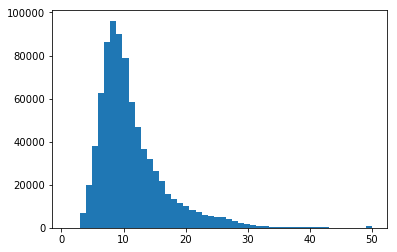

In [53]:
import matplotlib.pyplot as plt
plt.hist(lens, bins=50)

### quora submission

In [89]:
test=pd.read_csv('/mnt/quora_kaggle/test.csv')
test.head(2)

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?


In [174]:
#try this later
t=time.time()
pool = Pool(10)
pool.map(work, np.ones(10000000))
pool.close()
pool.join()
print (time.time()-t)

39.52502632141113


In [154]:
import time
from multiprocessing import Pool
def work(a):
    return a+1

In [170]:
%%time
t=time.time()
for i in range(1000000):
    i+=1 
print (time.time()-t)

0.10987281799316406
CPU times: user 100 ms, sys: 12 ms, total: 112 ms
Wall time: 110 ms


In [151]:
i

1000000

In [91]:
lens=[]
q1_w2v_test={}
q2_w2v_test={}
i=0
remove_chars="[!@#$?()-/:'`,.1234567890]"
for row in test.iterrows():
    
    for question_id in [1,2]:
        sum=np.zeros(50)
        try:
            words=enumerate(re.split(" ", re.sub(remove_chars, '', row[1][0+question_id])))
        except:
            pass
        for word_id,word in words:
            if word!=' ':
                try:
                    sum+=w2v(word.lower())
                except:
                    if i%100==0:
                        print (' ',word)
            if question_id==1:
                q1_w2v_test[row[1][0]]=sum/word_id
            elif question_id==2:
                q2_w2v_test[row[1][0]]=sum/word_id
    i+=1
    if i % 10000==1:
        print(i)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:22: RuntimeWarning: divide by zero encountered in true_divide
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:24: RuntimeWarning: divide by zero encountered in true_divide


  
  
1
  


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in true_divide


  
  
  
  "bro"
  clanmate
  lagoonal
  
  
  
  redwhite
  redgreen
  
  "Cant
  now"
  Perus
  Bolivias
  "sweet
  "a
  words"
  alibabacom
  supplierswholesalers
  alibabacom
  supplierswholesalers
  Duryodhan
  Swarg
  "Is
  possible"
  "How
  it"
  productbased
  theifwhen
  Venmo
  
  
  
  
  Laymans
  laymans
  
  yoMy
  kumarif
  imageconscious
  i’m
  
  
  
  nlsiu
  boption
  
  DelhiIndia
  
  
  MCOMS
  WiffleBall
  brexit
  day"
  Roshans
  Kaabil
  personcan
  
  
  "your
  improvement"
  
  
  
  
  
  Webstorm
  AngularJS
  Chumbak
  Chumbak
  
  DelhiNCR
10001
  "Chaudhuri"
  "Chowdhury"
  well？
  don’t
  can’t
  
  \begin{bmatrix}
  
  cdrw
  classgroup
  oneonone
  "Avengers"
  
  
  
  
  
  "a"
  "como
  señor"
  "como
  esta"
  Redis
  Pluralsight
  "Covert
  Affairs"
  "Covert
  Affairs"
  
  
  
  
  
  
  "bored
  housewives"
  "lick
  him"
  Hinduismsanatana
  knowledgewhat
  
  akline
  
  DILR
  
  oniisama
  
  collegeuniversity
  BEBTech
  MSPhD
  alumn

In [92]:
def save_array(fname, arr):
    c=bcolz.carray(arr, rootdir=fname, mode='w')
    c.flush()


def load_array(fname):
    return bcolz.open(fname)[:]

In [93]:
cd /mnt/quora_kaggle/

/home/ubuntu/nbs/fast_ai/fast_ai_course/deeplearning1/nbs


In [94]:
save_array('/mnt/quora_kaggle/q1_w2v_test', q1_w2v_test)
save_array('/mnt/quora_kaggle/q2_w2v_test', q2_w2v_test)

In [ ]:
#load_array

In [95]:
#process test
test_indices=np.intersect1d(list(q1_w2v_test.keys()),list(q2_w2v_test.keys()))

In [96]:
len(test_indices)

2345790

In [97]:
test_list=[]
for i in test_indices:
    test_list.append(diff(q1_w2v_test[i],q2_w2v_test[i]))

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in subtract
  app.launch_new_instance()


In [ ]:
test.iloc[test_indices]=test_list

In [98]:
dtest = xgb.DMatrix(test_list)
preds = bst.predict(dtest)

In [100]:
len(preds),len(test)

(2345790, 2345796)

In [136]:
np.round(preds[:10],3)

array([ 0.41100001,  0.42899999,  0.42899999,  0.13699999,  0.366     ,
        0.204     ,  0.50400001,  0.48500001,  0.47      ,  0.46799999], dtype=float32)

In [137]:
sub=pd.DataFrame(np.round(preds,3),test_indices)

In [144]:
final_sub.head()

,test_id,is_duplicate
0,0,0.411
1,1,0.429
2,2,0.429
3,3,0.137
4,4,0.366


In [138]:
missing=np.setdiff1d(range(2345795),test_indices)

In [139]:
appendix=pd.DataFrame(np.zeros(len(missing)),missing)

In [140]:
cd /mnt/quora_kaggle/

/mnt/quora_kaggle


In [141]:
final_sub=sub.append(appendix)
final_sub=final_sub.reset_index()
final_sub.columns=['test_id','is_duplicate']

In [145]:
final_sub.to_csv('first_sub.csv',index=False, float_format='%.4f')